# Transformation

Spark Transformation is a **function that produces new RDD from the existing RDDs**. It takes **RDD as input and produces one or more RDD as output**. Each time it creates **new RDD when we apply any transformation. Thus, the so input RDDs, cannot be changed since RDD are immutable in nature.**

Applying transformation built an **RDD lineage, with the entire parent RDDs of the final RDD(s)**. RDD lineage, also known as RDD operator graph or RDD dependency graph. It is a logical execution plan i.e., it is **Directed Acyclic Graph (DAG) of the entire parent RDDs of RDD.**

**Transformations are lazy in nature i.e., they get execute when we call an action. They are not executed immediately.**

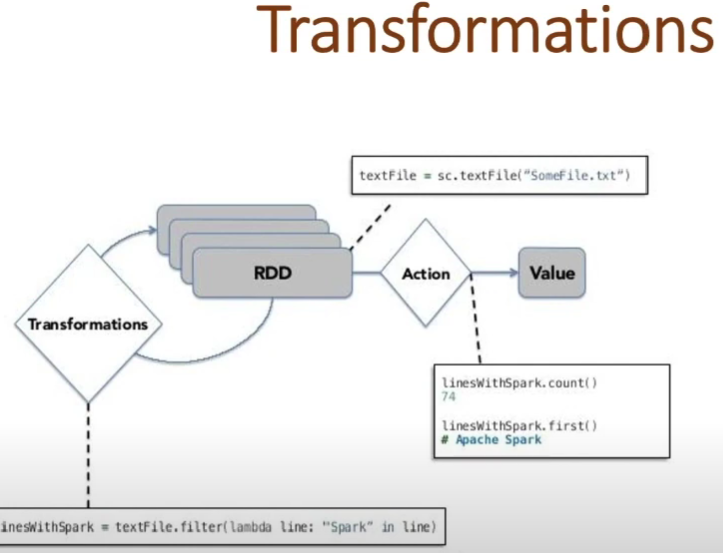

There are two types of transformations:
## Narrow transformation
In Narrow transformation, all the elements that are required to compute the records in single partition live in the single partition of parent RDD. A limited subset of partition is used to calculate the result. Narrow transformations are the result of map(), filter().

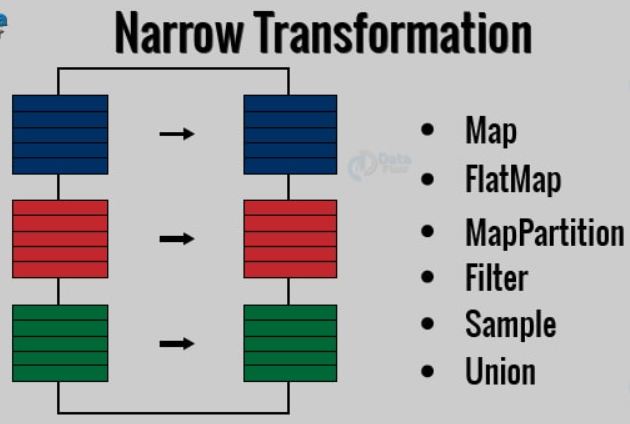

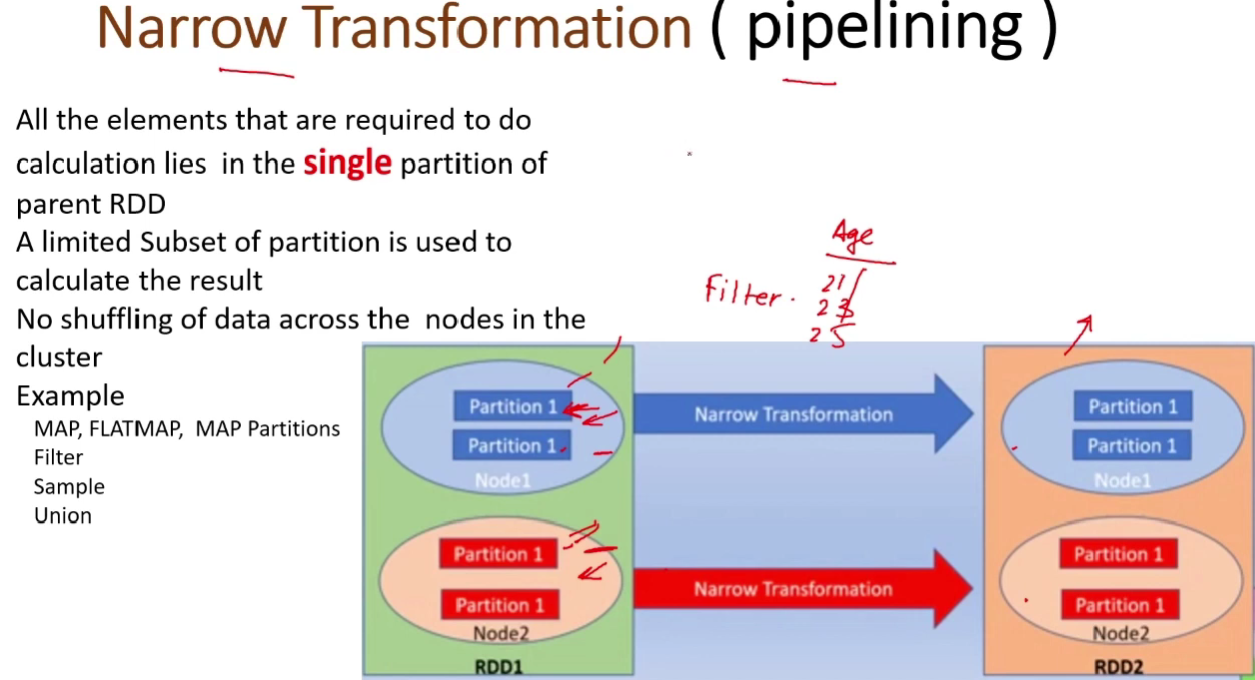



# Narrow transformation

In Narrow transformation, all the elements that are required to compute the records in single partition live in the single partition of parent RDD. A limited subset of partition is used to calculate the result. Narrow transformations are the result of map(), filter().

<img src="attachment:c4fa9745-5641-48bb-9ee7-c5b73755d81a.png" width=400 />

<img src="attachment:8a087396-7604-4c82-864c-8791c3fb00df.png" width=500 />

In [2]:
from pyspark import SparkContext, SparkConf
sc = SparkContext("local","First App")

## Map

Spark map() transformation **applies a function to each row in a DataFrame/Dataset and returns the new transformed Dataset.**

Now, map transforms an **RDD of length N into another RDD of length N.**

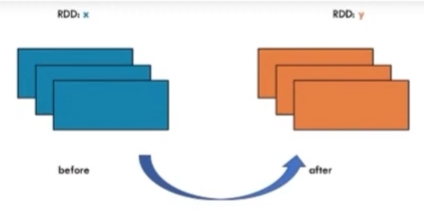

In [3]:
num = sc.parallelize([5,5,4,3,2,9,2])
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [4]:
num.map(lambda a: a*2).collect()

[10, 10, 8, 6, 4, 18, 4]

In [5]:
num.map(lambda a: pow(a,3)).collect()

[125, 125, 64, 27, 8, 729, 8]

In [15]:
str_arr = sc.parallelize(["Roses are red", "Violets are blue"])
str_arr.map(lambda x: x.split(" ")).collect()

[['Roses', 'are', 'red'], ['Violets', 'are', 'blue']]

## FlatMap

**Spark flatMap() transformation flattens the DataFrame/Dataset after applying the function on every element and returns a new transformed Dataset. The returned Dataset will return more rows than the current DataFrame. It is also referred to as a one-to-many transformation function. This is one of the major differences between flatMap() and map()**.

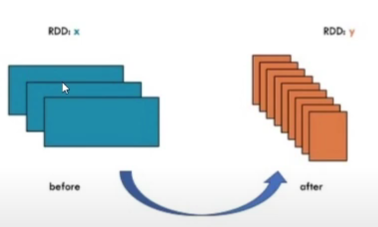

In [6]:
rdd = sc.parallelize([2,3,4])
rdd.collect()

[2, 3, 4]

In [7]:
for i in range(1,3):
    print(i)

1
2


In [8]:
rdd.flatMap(lambda x: range(1, x)).collect()

[1, 1, 2, 1, 2, 3]

In [9]:
a = sc.parallelize([1,2,3])

In [10]:
a.flatMap(lambda x: (x,x*10,57)).collect()

[1, 10, 57, 2, 20, 57, 3, 30, 57]

In [17]:
str_arr = sc.parallelize(["Roses are red", "Violets are blue"])
str_arr.flatMap(lambda x: x.split(" ")).collect()

['Roses', 'are', 'red', 'Violets', 'are', 'blue']

## Filter

In [18]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [20]:
num.filter(lambda x: x%2==0).collect()

[4, 2, 2]

## Union

In [21]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [22]:
num2 = sc.parallelize([1,7,9,4,10,15])
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [23]:
num.union(num2).collect()

[5, 5, 4, 3, 2, 9, 2, 1, 7, 9, 4, 10, 15]

## Sample

In [24]:
parallel = sc.parallelize(range(1,10))
parallel.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [25]:
parallel.sample(True, .2).collect()

[4, 8]

In [26]:
parallel.sample(True, .2).collect()

[9]

In [27]:
parallel.sample(True, .2).collect()

[2, 5, 7]

In [28]:
parallel.sample(True, .2, seed=19).collect()

[2, 4, 6, 9]

In [29]:
parallel.sample(True, .2, seed=19).collect()

[2, 4, 6, 9]

In [32]:
parallel.sample(False, .2, seed=19).collect()

[6]

## mapPartitions

Similar to map() PySpark mapPartitions() is a **narrow transformation operation that applies a function to each partition of the RDD, if you have a DataFrame, you need to convert to RDD in order to use it**. mapPartitions() is mainly used **to initialize connections once for each partition instead of every row, this is the main difference between map() vs mapPartitions()**. It is a narrow transformation as there will not be any data movement/shuffling between partitions to perform the function.

In [36]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SparkByExamples.com').getOrCreate()
data = [('James','Smith','M',3000),
  ('Anna','Rose','F',4100),
  ('Robert','Williams','M',6200), 
]

columns = ["firstname","lastname","gender","salary"]
df = spark.createDataFrame(data=data, schema = columns)
df.show()

+---------+--------+------+------+
|firstname|lastname|gender|salary|
+---------+--------+------+------+
|    James|   Smith|     M|  3000|
|     Anna|    Rose|     F|  4100|
|   Robert|Williams|     M|  6200|
+---------+--------+------+------+



In [37]:
def reformat(partitionData):
    updatedData = []
    for row in partitionData:
        name=row.firstname+','+row.lastname
        bonus = row.salary*0.5
        updatedData.append([name,bonus])
    return iter(updatedData)


df2 = df.rdd.mapPartitions(reformat).toDF(["name", "bonus"])
df2.show()

+---------------+------+
|           name| bonus|
+---------------+------+
|    James,Smith|1500.0|
|      Anna,Rose|2050.0|
|Robert,Williams|3100.0|
+---------------+------+



In [38]:
def simpleGeneratorFun():
    yield 1
    yield 2
    yield 3

# Driver code to check above generator function
for value in simpleGeneratorFun():
    print(value)

1
2
3


## Map vs MapPartitions

| Map    | MapPartition |
| -------- | ------- |
| The map works on a single Row at a time.  |  MapPartition works on a partition at a time.  |
| Map returns after each input Row. | MapPartition returns after processing all the rows in the partition.     |
| The map doesn’t hold the output result in Memory.    | MapPartition output is retained in memory, as it can return after processing all the rows in a particular partition.    |
|Map no way to figure out then to end the service.|MapPartition service can be shut down before returning.|

# Wide transformation
In wide transformation, all the elements that are required to compute the records in the single partition may live in many partitions of parent RDD. The partition may live in many partitions of parent RDD. Wide transformations are the result of groupbyKey() and reducebyKey().

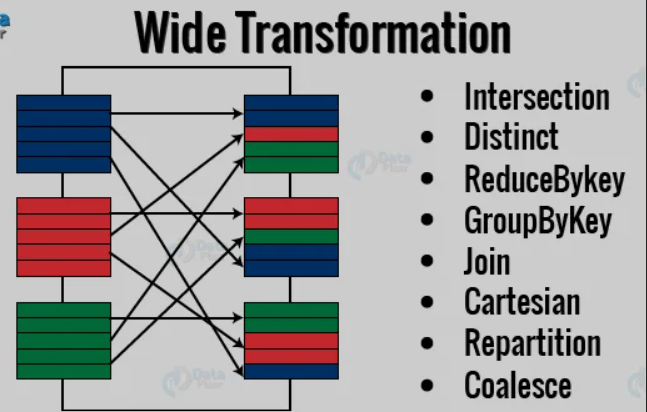

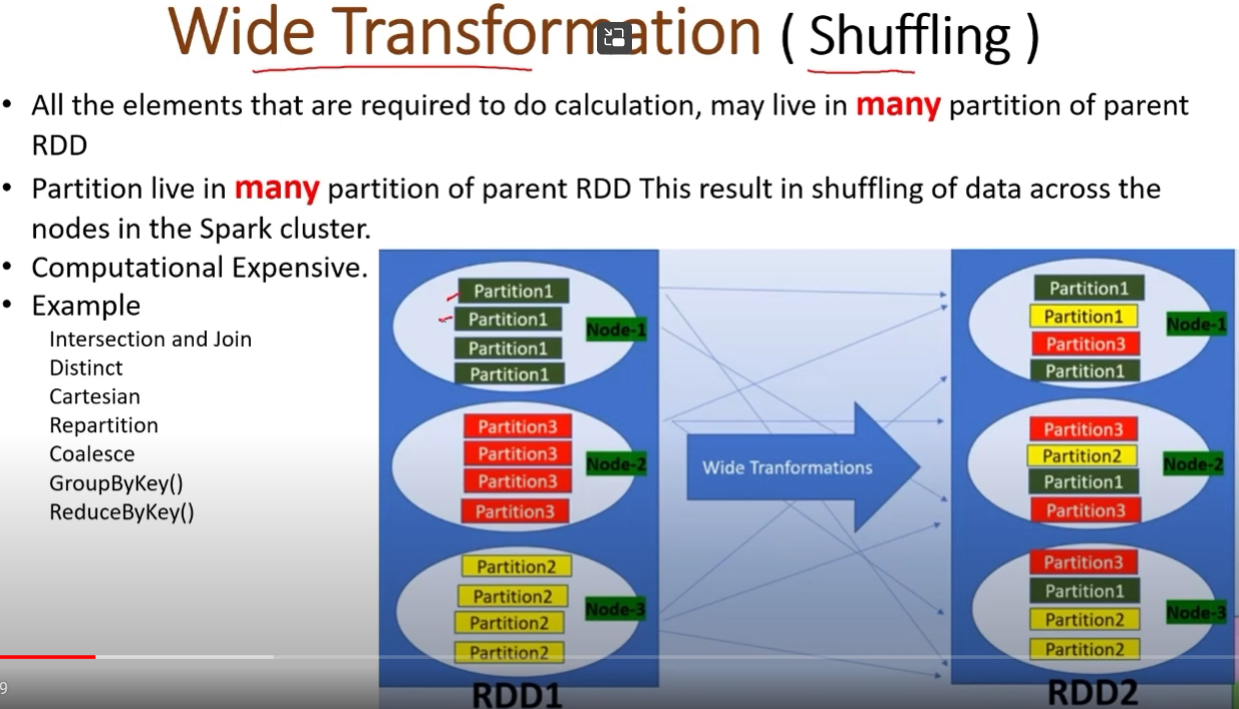

## GroupBy

In [44]:
simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000),
    ("Robert","Sales","CA",81000,30,23000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Raman","Finance","CA",99000,40,24000),
    ("Scott","Finance","NY",83000,36,19000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

schema = ["employee_name","department","state","salary","age","bonus"]
df = spark.createDataFrame(data=simpleData, schema = schema)
df.printSchema()
df.show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- state: string (nullable = true)
 |-- salary: long (nullable = true)
 |-- age: long (nullable = true)
 |-- bonus: long (nullable = true)

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|James        |Sales     |NY   |90000 |34 |10000|
|Michael      |Sales     |NY   |86000 |56 |20000|
|Robert       |Sales     |CA   |81000 |30 |23000|
|Maria        |Finance   |CA   |90000 |24 |23000|
|Raman        |Finance   |CA   |99000 |40 |24000|
|Scott        |Finance   |NY   |83000 |36 |19000|
|Jen          |Finance   |NY   |79000 |53 |15000|
|Jeff         |Marketing |CA   |80000 |25 |18000|
|Kumar        |Marketing |NY   |91000 |50 |21000|
+-------------+----------+-----+------+---+-----+



In [49]:
df.groupBy('department').mean().collect()

[Row(department='Sales', avg(salary)=85666.66666666667, avg(age)=40.0, avg(bonus)=17666.666666666668),
 Row(department='Finance', avg(salary)=87750.0, avg(age)=38.25, avg(bonus)=20250.0),
 Row(department='Marketing', avg(salary)=85500.0, avg(age)=37.5, avg(bonus)=19500.0)]

In [52]:
names = sc.parallelize(['Bills', 'Mark', 'Brain', 'Mick'])

In [53]:
names.collect()

['Bills', 'Mark', 'Brain', 'Mick']

In [54]:
names_gr = names.groupBy(lambda x:x[0])

In [55]:
names_gr.collect()

[('B', <pyspark.resultiterable.ResultIterable at 0x1ee46842a60>),
 ('M', <pyspark.resultiterable.ResultIterable at 0x1ee46842d90>)]

In [56]:
for k,v in names_gr.collect():
    print(k, list(v))

B ['Bills', 'Brain']
M ['Mark', 'Mick']


In [58]:
aa = sc.parallelize([1,1,2,3,5,8])
result = aa.groupBy(lambda x: x % 2).collect()

In [59]:
for k,v in result:
    print(k, list(v))

1 [1, 1, 3, 5]
0 [2, 8]


## Intersection

In [60]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [61]:
num2.collect()

[1, 7, 9, 4, 10, 15]

In [63]:
num.intersection(num2).collect()

[4, 9]

In [68]:
num2.intersection(num).collect()

[4, 9]

## Subtract

In [72]:
type(num)

pyspark.rdd.RDD

In [70]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [71]:
num2.collect()

[1, 7, 9, 4, 10, 15]

In [64]:
num.subtract(num2).collect()

[2, 2, 5, 5, 3]

In [69]:
num2.subtract(num).collect()

[10, 1, 7, 15]

## Distinct

In [73]:
num.collect()

[5, 5, 4, 3, 2, 9, 2]

In [74]:
num.distinct().collect()

[5, 4, 3, 2, 9]

## Transformation on key value pair

In [75]:
data = sc.parallelize([(1,2),(3,4),(3,6),(3,4)])
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [76]:
type(data)

pyspark.rdd.RDD

In [77]:
data.count()

4

### Count & CountByValue

**CountByValue** - will check if all value in tuples are same.

In [79]:
print(type(data.countByValue()))
data.countByValue()

<class 'collections.defaultdict'>


defaultdict(int, {(1, 2): 1, (3, 4): 2, (3, 6): 1})

In [84]:
dataStr = sc.parallelize([(1, 'mike'), (2, 'john'), (3, 'rambo'), (3, 'bill'), (3, 'rambo')])
dataStr.collect()

[(1, 'mike'), (2, 'john'), (3, 'rambo'), (3, 'bill'), (3, 'rambo')]

In [85]:
dataStr.count()

5

In [86]:
dataStr.countByValue()

defaultdict(int,
            {(1, 'mike'): 1, (2, 'john'): 1, (3, 'rambo'): 2, (3, 'bill'): 1})

In [87]:
dataStr.countByKey()

defaultdict(int, {1: 1, 2: 1, 3: 3})

In [88]:
dataStr.top(2)

[(3, 'rambo'), (3, 'rambo')]

### Sort

In [90]:
dataStr.sortByKey().collect()

[(1, 'mike'), (2, 'john'), (3, 'rambo'), (3, 'bill'), (3, 'rambo')]

### lookup

Returns all value associated with the given key

In [92]:
dataStr.lookup(3)

['rambo', 'bill', 'rambo']

In [93]:
dataStr.lookup(2)

['john']

### Keys

In [95]:
dataStr.keys().collect()

[1, 2, 3, 3, 3]

In [96]:
dataStr.values().collect()

['mike', 'john', 'rambo', 'bill', 'rambo']

In [97]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

### Map Values

In [98]:
data.mapValues(lambda a: a*a).collect()

[(1, 4), (3, 16), (3, 36), (3, 16)]

### ReduceByKey

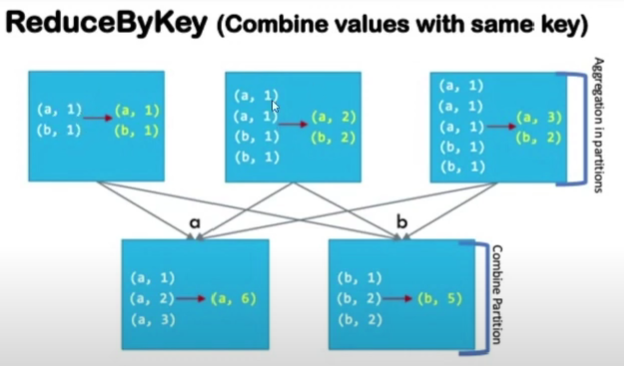

**Group in each Partition. More efficient & faster than `groupByKey`**

In [99]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [111]:
data.reduceByKey(lambda x,y:x+y).collect()

[(1, 2), (3, 14)]

### GroupbyKey

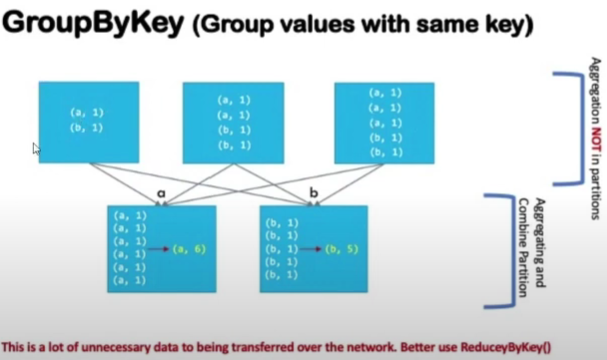

<span style="color:red">**Lot of unnecessary data is being tranferred over the network since grouping is done at last. Better to use `ReduceByKey`**</span>

In [101]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [100]:
data.groupByKey().collect()

[(1, <pyspark.resultiterable.ResultIterable at 0x1ee47b08eb0>),
 (3, <pyspark.resultiterable.ResultIterable at 0x1ee47b083d0>)]

In [103]:
for k,v in data.groupByKey().collect():
    print('key : ', k)
    print('value :', list(v))

key :  1
value : [2]
key :  3
value : [4, 6, 4]


In [105]:
data.groupByKey().mapValues(sum).collect()

[(1, 2), (3, 14)]

In [106]:
data.groupByKey().mapValues(max).collect()

[(1, 2), (3, 6)]

### ReduceByKey vs GroupByKey

ReduceByKey = groupByKey().mapValues()

### flatMapValue

In [113]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [114]:
data.flatMapValues(lambda x: range(1,x)).collect()

[(1, 1),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 1),
 (3, 2),
 (3, 3)]

### SubtractByKey

In [118]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [119]:
data2 = sc.parallelize([(3,9)])
data2.collect()

[(3, 9)]

In [120]:
data.subtractByKey(data2).collect()

[(1, 2)]

In [121]:
data2.subtractByKey(data).collect()

[]

## Join

In [122]:
data2 = sc.parallelize([(3,9),(4,15)])
data2.collect()

[(3, 9), (4, 15)]

In [123]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [124]:
data.join(data2).collect()

[(3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [125]:
data2.join(data).collect()

[(3, (9, 4)), (3, (9, 6)), (3, (9, 4))]

### Right outer join

In [126]:
data.rightOuterJoin(data2).collect()

[(4, (None, 15)), (3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [127]:
data2.rightOuterJoin(data).collect()

[(3, (9, 4)), (3, (9, 6)), (3, (9, 4)), (1, (None, 2))]

### Left outer join

In [130]:
data.collect()

[(1, 2), (3, 4), (3, 6), (3, 4)]

In [131]:
data2.collect()

[(3, 9), (4, 15)]

In [128]:
data.leftOuterJoin(data2).collect()

[(1, (2, None)), (3, (4, 9)), (3, (6, 9)), (3, (4, 9))]

In [129]:
data2.leftOuterJoin(data).collect()

[(4, (15, None)), (3, (9, 4)), (3, (9, 6)), (3, (9, 4))]